In [1]:
from pysradb import SRAweb
import pandas as pd
from tqdm import tqdm

C:\Anaconda\Lib\site-packages\pysradb\utils.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqDataSet

In [31]:
db = SRAweb()
metadata = db.sra_metadata("SRP301424", detailed=True)

In [32]:
metadata

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,experiment_alias,source_name,tissue,medulloblastoma subgroup,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
0,SRR13417297,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,SRR13417298,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,SRR13417299,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,SRR13417300,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,SRR13417301,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833371,GSM5016875: HX-2; Homo sapiens; RNA-Seq,GSM5016875: HX-2; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016875,primary tissue,Tumor,Group3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,SRR13417490,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833428,GSM5016932: BT296; Homo sapiens; RNA-Seq,GSM5016932: BT296; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016932,primary tissue,Tumor,WNT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
194,SRR13417491,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833429,GSM5016933: BT298; Homo sapiens; RNA-Seq,GSM5016933: BT298; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016933,primary tissue,Tumor,Group3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
195,SRR13417492,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833430,GSM5016934: BT299; Homo sapiens; RNA-Seq,GSM5016934: BT299; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016934,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
196,SRR13417493,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833431,GSM5016935: BT300; Homo sapiens; RNA-Seq,GSM5016935: BT300; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016935,primary tissue,Tumor,WNT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [41]:
meta_filter = metadata.drop_duplicates(subset="experiment_accession")

In [43]:
meta_filter

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,experiment_alias,source_name,tissue,medulloblastoma subgroup,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
0,SRR13417297,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,SRR13417301,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833371,GSM5016875: HX-2; Homo sapiens; RNA-Seq,GSM5016875: HX-2; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016875,primary tissue,Tumor,Group3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,SRR13417305,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833372,GSM5016876: HX5; Homo sapiens; RNA-Seq,GSM5016876: HX5; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016876,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
12,SRR13417309,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833373,GSM5016877: HX9; Homo sapiens; RNA-Seq,GSM5016877: HX9; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016877,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16,SRR13417313,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833374,GSM5016878: HX25; Homo sapiens; RNA-Seq,GSM5016878: HX25; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016878,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,SRR13417490,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833428,GSM5016932: BT296; Homo sapiens; RNA-Seq,GSM5016932: BT296; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016932,primary tissue,Tumor,WNT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
194,SRR13417491,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833429,GSM5016933: BT298; Homo sapiens; RNA-Seq,GSM5016933: BT298; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016933,primary tissue,Tumor,Group3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
195,SRR13417492,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833430,GSM5016934: BT299; Homo sapiens; RNA-Seq,GSM5016934: BT299; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016934,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
196,SRR13417493,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833431,GSM5016935: BT300; Homo sapiens; RNA-Seq,GSM5016935: BT300; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016935,primary tissue,Tumor,WNT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [45]:
meta_filter.columns

Index(['run_accession', 'study_accession', 'study_title',
       'experiment_accession', 'experiment_title', 'experiment_desc',
       'organism_taxid', 'organism_name', 'library_name', 'library_strategy',
       'library_source', 'library_selection', 'library_layout',
       'sample_accession', 'sample_title', 'biosample', 'bioproject',
       'instrument', 'instrument_model', 'instrument_model_desc',
       'total_spots', 'total_size', 'run_total_spots', 'run_total_bases',
       'run_alias', 'public_filename', 'public_size', 'public_date',
       'public_md5', 'public_version', 'public_semantic_name',
       'public_supertype', 'public_sratoolkit', 'aws_url', 'aws_free_egress',
       'aws_access_type', 'public_url', 'ncbi_url', 'ncbi_free_egress',
       'ncbi_access_type', 'gcp_url', 'gcp_free_egress', 'gcp_access_type',
       'experiment_alias', 'source_name', 'tissue', 'medulloblastoma subgroup',
       'ena_fastq_http', 'ena_fastq_http_1', 'ena_fastq_http_2',
       'ena_fastq

In [47]:
meta_filter["source_name"].value_counts()

source_name
primary tissue    63
Name: count, dtype: int64

In [49]:
meta_filter["tissue"].value_counts()

tissue
Tumor         59
para-Tumor     4
Name: count, dtype: int64

In [51]:
meta_filter["medulloblastoma subgroup"].value_counts()

medulloblastoma subgroup
Group4        19
SHH           19
Group3        15
WNT            6
n/a (NORM)     4
Name: count, dtype: int64

In [57]:
!pysradb download -g GSE164677


The following files will be downloaded: 

GSE164677_Asian_MB_RNA-seq.txt.gz





In [71]:
meta_filter.loc[:,"Sample_Name"] = meta_filter["experiment_title"].str.split(":").str[0]
meta_filter = meta_filter.set_index("Sample_Name")
meta_filter

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,experiment_alias,source_name,tissue,medulloblastoma subgroup,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
Sample_Name,,,,,,,,,,,,,,,,,,,,,
GSM5016874,SRR13417297,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
GSM5016875,SRR13417301,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833371,GSM5016875: HX-2; Homo sapiens; RNA-Seq,GSM5016875: HX-2; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016875,primary tissue,Tumor,Group3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
GSM5016876,SRR13417305,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833372,GSM5016876: HX5; Homo sapiens; RNA-Seq,GSM5016876: HX5; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016876,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
GSM5016877,SRR13417309,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833373,GSM5016877: HX9; Homo sapiens; RNA-Seq,GSM5016877: HX9; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016877,primary tissue,Tumor,Group4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
GSM5016878,SRR13417313,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833374,GSM5016878: HX25; Homo sapiens; RNA-Seq,GSM5016878: HX25; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016878,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5016932,SRR13417490,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833428,GSM5016932: BT296; Homo sapiens; RNA-Seq,GSM5016932: BT296; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016932,primary tissue,Tumor,WNT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
GSM5016933,SRR13417491,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833429,GSM5016933: BT298; Homo sapiens; RNA-Seq,GSM5016933: BT298; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016933,primary tissue,Tumor,Group3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
GSM5016934,SRR13417492,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833430,GSM5016934: BT299; Homo sapiens; RNA-Seq,GSM5016934: BT299; Homo sapiens; RNA-Seq,9606,Homo sapiens,<NA>,RNA-Seq,...,GSM5016934,primary tissue,Tumor,SHH,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [76]:
meta_filter.to_csv("meta_SRP301424.csv")

In [80]:
counts = pd.read_csv("GSE164677_raw_counts_GRCh38.p13_NCBI.tsv", sep='\t')
counts

,GeneID,GSM5016874,GSM5016875,GSM5016876,GSM5016877,GSM5016878,GSM5016879,GSM5016880,GSM5016881,GSM5016882,...,GSM5016927,GSM5016928,GSM5016929,GSM5016930,GSM5016931,GSM5016932,GSM5016933,GSM5016934,GSM5016935,GSM5016936
0,100287102,22,8,2,23,18,14,15,20,10,...,23,6,3,3,25,6,11,14,15,4
1,653635,1532,761,517,1707,1349,1356,1780,1090,1333,...,4410,2530,911,955,2626,1283,2506,3047,1440,1652
2,102466751,30,16,13,48,57,39,73,49,71,...,101,42,13,13,62,24,148,72,29,47
3,107985730,10,12,1,26,10,18,27,2,15,...,32,35,5,14,12,10,36,13,33,12
4,100302278,3,2,1,9,2,4,4,0,4,...,10,3,1,3,2,2,7,2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,45998,8427,21489,30049,9905,11388,11372,14382,26068,...,388124,28974,7351,18648,89602,401851,14145,27879,37972,53493
39372,4556,6851,1095,3402,3576,1362,1114,1021,1538,2448,...,24021,2182,738,1564,3087,20986,732,1481,2404,3494
39373,4519,219730,155710,106518,86885,29259,90559,82896,64256,132625,...,1003078,180727,70914,77450,577256,1024641,177936,362203,135338,142321
39374,4576,524,204,202,196,109,107,100,82,124,...,1744,392,176,169,523,1211,139,243,665,226


In [86]:
gtf = pd.read_csv("Human.GRCh38.p13.annot.tsv", sep='\t', low_memory=False)
gtf

,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
geneid_to_name = gtf[["GeneID", "Symbol"]].drop_duplicates()

In [90]:
geneid_to_name

,GeneID,Symbol
0,100287102,DDX11L1
1,653635,WASH7P
2,102466751,MIR6859-1
3,107985730,MIR1302-2HG
4,100302278,MIR1302-2
...,...,...
39371,4541,ND6
39372,4556,TRNE
39373,4519,CYTB
39374,4576,TRNT


In [98]:
geneid_to_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39376 entries, 0 to 39375
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GeneID  39376 non-null  int64 
 1   Symbol  39376 non-null  object
dtypes: int64(1), object(1)
memory usage: 615.4+ KB


In [100]:
counts.columns

Index(['GeneID', 'GSM5016874', 'GSM5016875', 'GSM5016876', 'GSM5016877',
       'GSM5016878', 'GSM5016879', 'GSM5016880', 'GSM5016881', 'GSM5016882',
       'GSM5016883', 'GSM5016884', 'GSM5016885', 'GSM5016886', 'GSM5016887',
       'GSM5016888', 'GSM5016889', 'GSM5016890', 'GSM5016891', 'GSM5016892',
       'GSM5016893', 'GSM5016894', 'GSM5016895', 'GSM5016896', 'GSM5016897',
       'GSM5016898', 'GSM5016899', 'GSM5016900', 'GSM5016901', 'GSM5016902',
       'GSM5016903', 'GSM5016904', 'GSM5016905', 'GSM5016906', 'GSM5016907',
       'GSM5016908', 'GSM5016909', 'GSM5016910', 'GSM5016911', 'GSM5016912',
       'GSM5016913', 'GSM5016914', 'GSM5016915', 'GSM5016916', 'GSM5016917',
       'GSM5016918', 'GSM5016919', 'GSM5016920', 'GSM5016921', 'GSM5016922',
       'GSM5016923', 'GSM5016924', 'GSM5016925', 'GSM5016926', 'GSM5016927',
       'GSM5016928', 'GSM5016929', 'GSM5016930', 'GSM5016931', 'GSM5016932',
       'GSM5016933', 'GSM5016934', 'GSM5016935', 'GSM5016936'],
      dtype='obj

In [114]:
counts_subset = counts.merge(geneid_to_name, on="GeneID")[['Symbol','GSM5016874', 'GSM5016875', 'GSM5016876', 'GSM5016877',
       'GSM5016878', 'GSM5016879', 'GSM5016880', 'GSM5016881', 'GSM5016882',
       'GSM5016883', 'GSM5016884', 'GSM5016885', 'GSM5016886', 'GSM5016887',
       'GSM5016888', 'GSM5016889', 'GSM5016890', 'GSM5016891', 'GSM5016892',
       'GSM5016893', 'GSM5016894', 'GSM5016895', 'GSM5016896', 'GSM5016897',
       'GSM5016898', 'GSM5016899', 'GSM5016900', 'GSM5016901', 'GSM5016902',
       'GSM5016903', 'GSM5016904', 'GSM5016905', 'GSM5016906', 'GSM5016907',
       'GSM5016908', 'GSM5016909', 'GSM5016910', 'GSM5016911', 'GSM5016912',
       'GSM5016913', 'GSM5016914', 'GSM5016915', 'GSM5016916', 'GSM5016917',
       'GSM5016918', 'GSM5016919', 'GSM5016920', 'GSM5016921', 'GSM5016922',
       'GSM5016923', 'GSM5016924', 'GSM5016925', 'GSM5016926', 'GSM5016927',
       'GSM5016928', 'GSM5016929', 'GSM5016930', 'GSM5016931', 'GSM5016932',
       'GSM5016933', 'GSM5016934', 'GSM5016935', 'GSM5016936']]

In [124]:
count_with_gene_name = counts_subset.set_index("Symbol")

In [126]:
count_with_gene_name

,GSM5016874,GSM5016875,GSM5016876,GSM5016877,GSM5016878,GSM5016879,GSM5016880,GSM5016881,GSM5016882,GSM5016883,...,GSM5016927,GSM5016928,GSM5016929,GSM5016930,GSM5016931,GSM5016932,GSM5016933,GSM5016934,GSM5016935,GSM5016936
Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,22,8,2,23,18,14,15,20,10,11,...,23,6,3,3,25,6,11,14,15,4
WASH7P,1532,761,517,1707,1349,1356,1780,1090,1333,1646,...,4410,2530,911,955,2626,1283,2506,3047,1440,1652
MIR6859-1,30,16,13,48,57,39,73,49,71,61,...,101,42,13,13,62,24,148,72,29,47
MIR1302-2HG,10,12,1,26,10,18,27,2,15,17,...,32,35,5,14,12,10,36,13,33,12
MIR1302-2,3,2,1,9,2,4,4,0,4,2,...,10,3,1,3,2,2,7,2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND6,45998,8427,21489,30049,9905,11388,11372,14382,26068,58514,...,388124,28974,7351,18648,89602,401851,14145,27879,37972,53493
TRNE,6851,1095,3402,3576,1362,1114,1021,1538,2448,5118,...,24021,2182,738,1564,3087,20986,732,1481,2404,3494
CYTB,219730,155710,106518,86885,29259,90559,82896,64256,132625,324306,...,1003078,180727,70914,77450,577256,1024641,177936,362203,135338,142321


In [128]:
#count_with_gene_name.to_csv("count_with_gene_name.csv")

In [5]:
count_gene_N = pd.read_csv("count_with_gene_name.csv", index_col=0)
count_gene_N

,GSM5016874,GSM5016875,GSM5016876,GSM5016877,GSM5016878,GSM5016879,GSM5016880,GSM5016881,GSM5016882,GSM5016883,...,GSM5016927,GSM5016928,GSM5016929,GSM5016930,GSM5016931,GSM5016932,GSM5016933,GSM5016934,GSM5016935,GSM5016936
Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,22,8,2,23,18,14,15,20,10,11,...,23,6,3,3,25,6,11,14,15,4
WASH7P,1532,761,517,1707,1349,1356,1780,1090,1333,1646,...,4410,2530,911,955,2626,1283,2506,3047,1440,1652
MIR6859-1,30,16,13,48,57,39,73,49,71,61,...,101,42,13,13,62,24,148,72,29,47
MIR1302-2HG,10,12,1,26,10,18,27,2,15,17,...,32,35,5,14,12,10,36,13,33,12
MIR1302-2,3,2,1,9,2,4,4,0,4,2,...,10,3,1,3,2,2,7,2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND6,45998,8427,21489,30049,9905,11388,11372,14382,26068,58514,...,388124,28974,7351,18648,89602,401851,14145,27879,37972,53493
TRNE,6851,1095,3402,3576,1362,1114,1021,1538,2448,5118,...,24021,2182,738,1564,3087,20986,732,1481,2404,3494
CYTB,219730,155710,106518,86885,29259,90559,82896,64256,132625,324306,...,1003078,180727,70914,77450,577256,1024641,177936,362203,135338,142321


In [7]:
genes_to_keep =count_gene_N.index[count_gene_N.sum(axis=1)>=10]
count_filtered = count_gene_N.loc[genes_to_keep,]

In [9]:
count_filtered
count_filtered = count_filtered.drop_duplicates()

In [11]:
count_filtered.shape

(35265, 63)

In [13]:
meta_ = pd.read_csv("meta_SRP301424.csv", index_col=0)
meta_

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,experiment_alias,source_name,tissue,medulloblastoma subgroup,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
Sample_Name,,,,,,,,,,,,,,,,,,,,,
GSM5016874,SRR13417297,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833370,GSM5016874: HX-3; Homo sapiens; RNA-Seq,GSM5016874: HX-3; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016874,primary tissue,Tumor,Group4,NaN,NaN,NaN,NaN,NaN,NaN
GSM5016875,SRR13417301,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833371,GSM5016875: HX-2; Homo sapiens; RNA-Seq,GSM5016875: HX-2; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016875,primary tissue,Tumor,Group3,NaN,NaN,NaN,NaN,NaN,NaN
GSM5016876,SRR13417305,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833372,GSM5016876: HX5; Homo sapiens; RNA-Seq,GSM5016876: HX5; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016876,primary tissue,Tumor,SHH,NaN,NaN,NaN,NaN,NaN,NaN
GSM5016877,SRR13417309,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833373,GSM5016877: HX9; Homo sapiens; RNA-Seq,GSM5016877: HX9; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016877,primary tissue,Tumor,Group4,NaN,NaN,NaN,NaN,NaN,NaN
GSM5016878,SRR13417313,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833374,GSM5016878: HX25; Homo sapiens; RNA-Seq,GSM5016878: HX25; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016878,primary tissue,Tumor,SHH,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5016932,SRR13417490,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833428,GSM5016932: BT296; Homo sapiens; RNA-Seq,GSM5016932: BT296; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016932,primary tissue,Tumor,WNT,NaN,NaN,NaN,NaN,NaN,NaN
GSM5016933,SRR13417491,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833429,GSM5016933: BT298; Homo sapiens; RNA-Seq,GSM5016933: BT298; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016933,primary tissue,Tumor,Group3,NaN,NaN,NaN,NaN,NaN,NaN
GSM5016934,SRR13417492,SRP301424,The Transcriptomic Landscape in Asian Medullob...,SRX9833430,GSM5016934: BT299; Homo sapiens; RNA-Seq,GSM5016934: BT299; Homo sapiens; RNA-Seq,9606,Homo sapiens,NaN,RNA-Seq,...,GSM5016934,primary tissue,Tumor,SHH,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
count_T = count_filtered.T

In [17]:
inference = DefaultInference(n_cpus=5)
dds = DeseqDataSet(
    counts= count_T,
    metadata = meta_,
    design_factors="medulloblastoma subgroup",
    refit_cooks=True,
    inference=inference
)

C:\Anaconda\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [19]:
# Variation of Sequencing depth
import matplotlib.pyplot as plt
import numpy as np


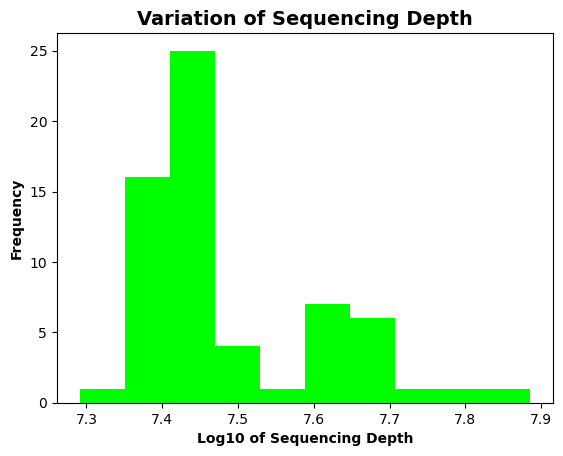

In [44]:
plt.hist(np.log10(count_filtered.sum(axis=0)), bins = 10, color="lime")
plt.xlabel('Log10 of Sequencing Depth', fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')
plt.title('Variation of Sequencing Depth', fontsize = 14, fontweight = 'bold')
plt.savefig("Plots/01_Variation_of_Sequencing_Depth.png", dpi = 512)

In [47]:
# Mean Variance Relationships
gene_mean = count_filtered.mean(axis=1)
gene_var = count_filtered.var(axis=1)

In [49]:
import matplotlib.pyplot as plt

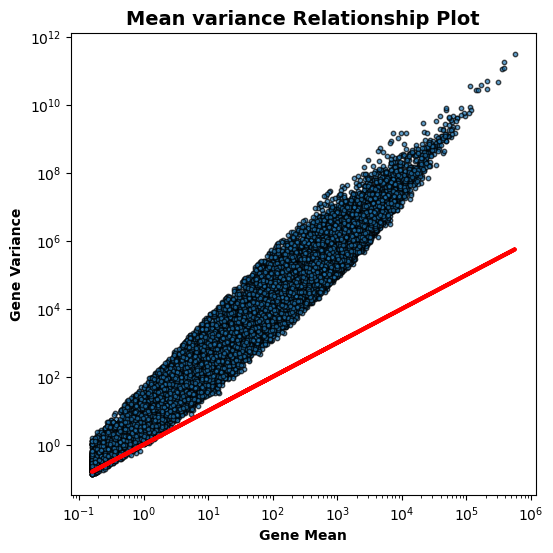

In [65]:
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(gene_mean, gene_var, s = 10, alpha = 0.7, edgecolors = 'k')
ax.plot(gene_mean,gene_mean, color = 'red', lw = 3, scalex=False, scaley=False)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Gene Mean", fontweight = 'bold')
ax.set_ylabel("Gene Variance", fontweight = 'bold')
ax.set_title("Mean variance Relationship Plot", fontsize = 14, fontweight = 'bold');
plt.savefig("Plots/02_Mean_Variance_Relationship_Plot.png", dpi = 512)